In [1]:
# outputs a plot, Figure 3, for the curves generated by tv.py
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import json
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [3]:
# different numbers of total components across the two mixtures
ks = [2, 4, 6, 12, 20, 30, 42, 56, 72, 90]
with open('data/tvplot.json', 'r') as f:
	vals = np.array(json.load(f))
seps = np.linspace(2,-2,51)

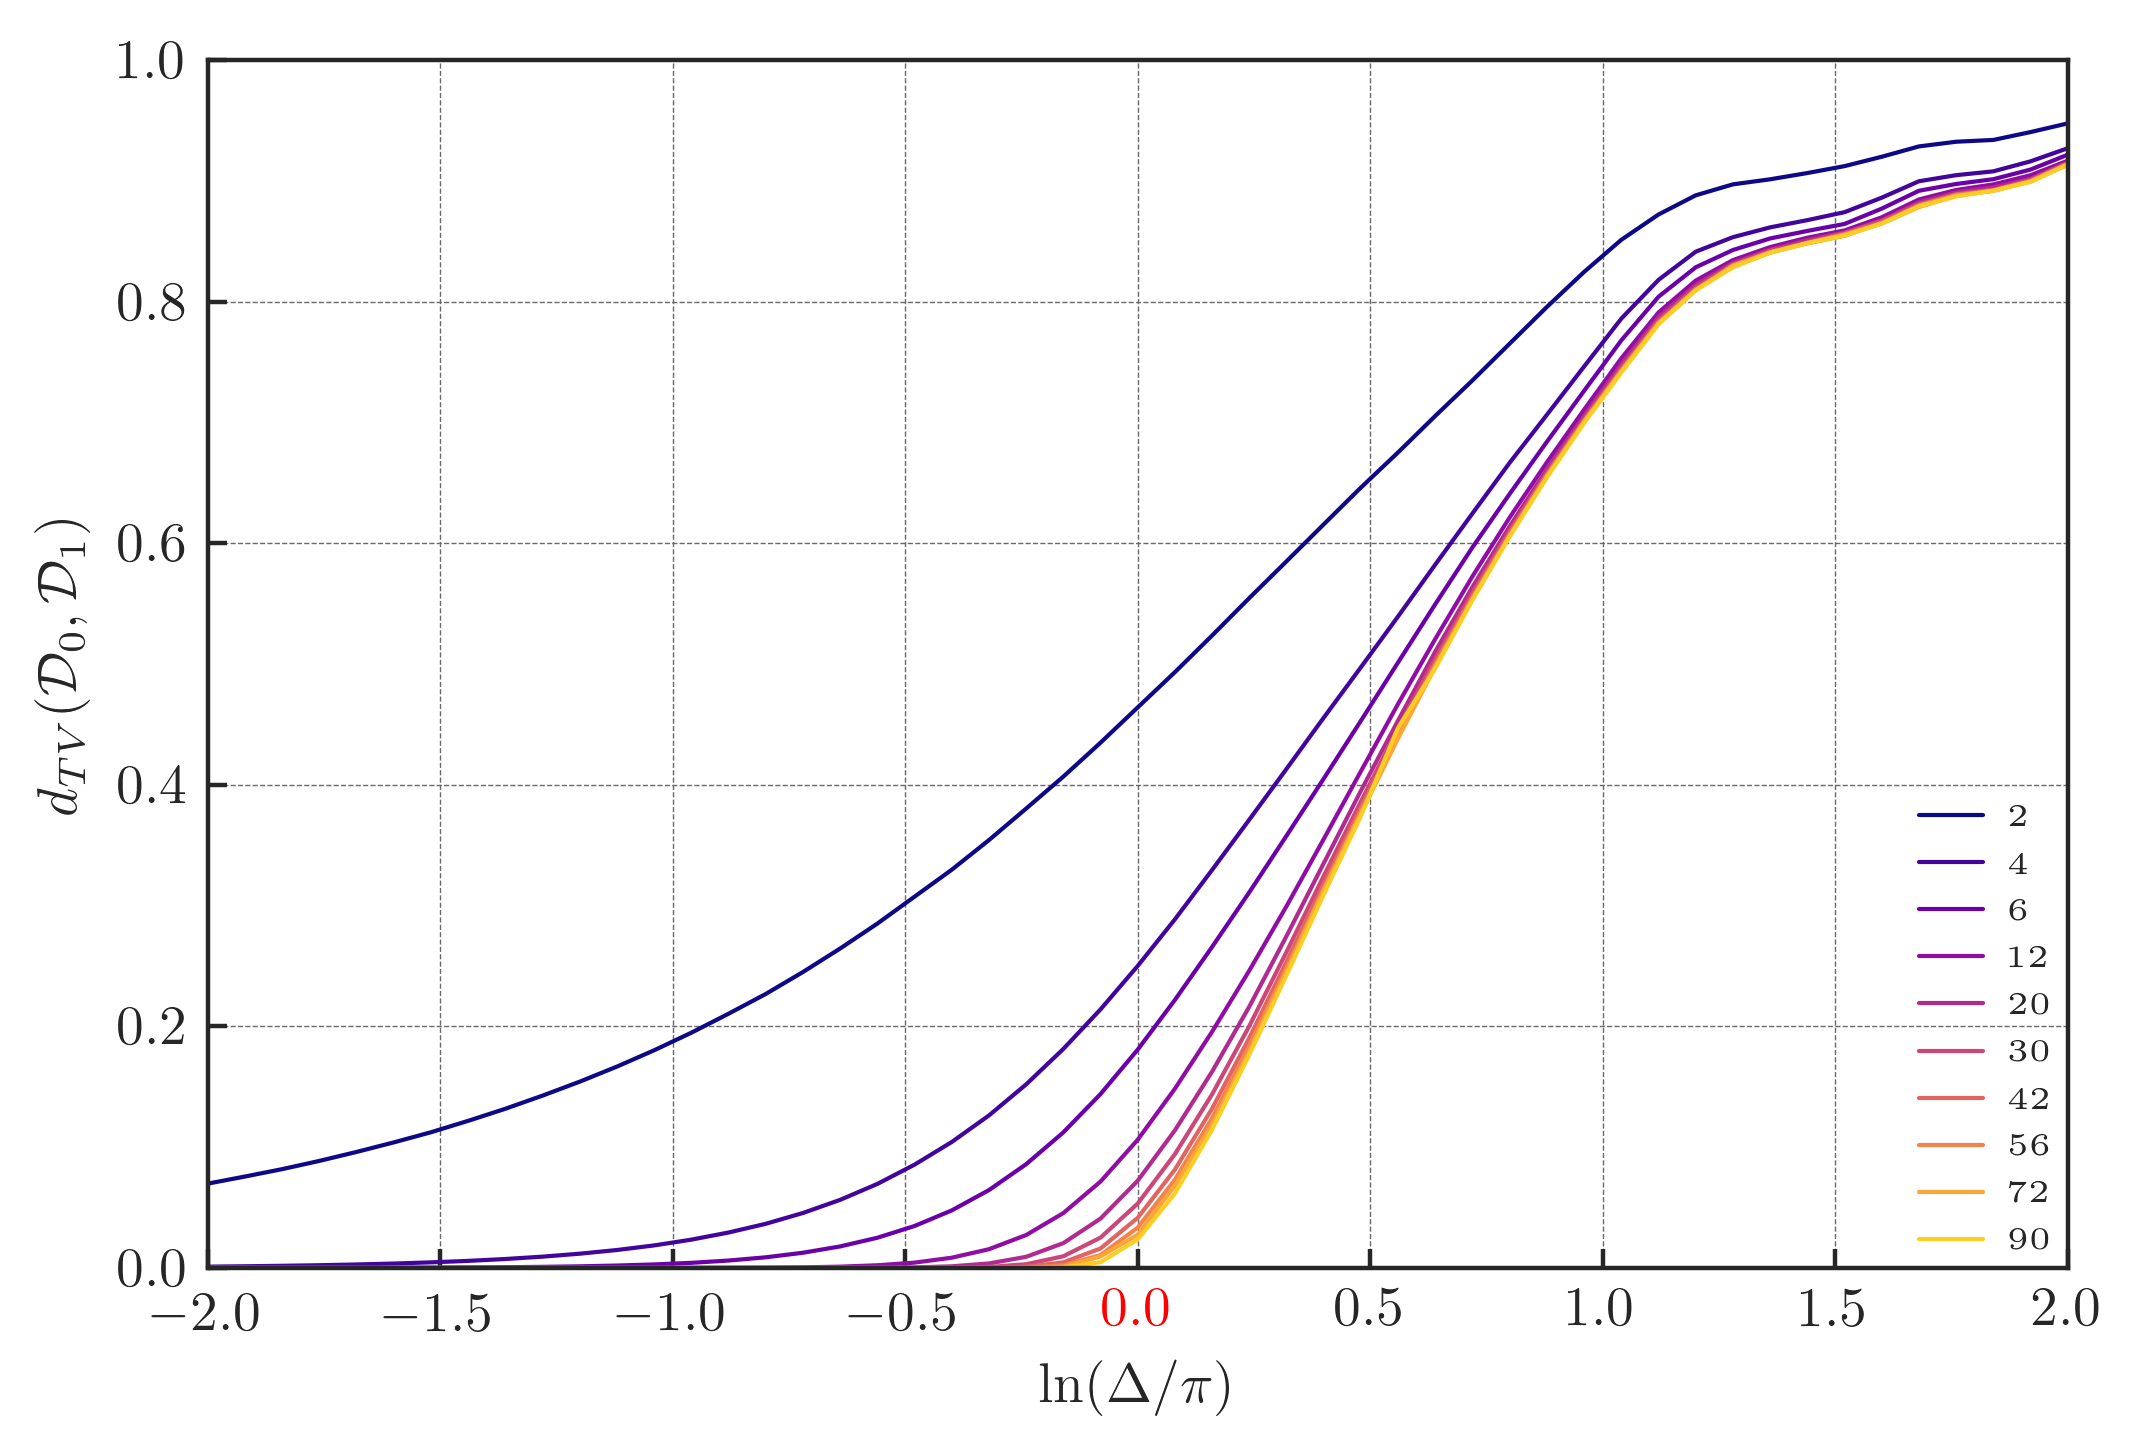

In [47]:
# plot curves with standard scaling
plt.rc('text', usetex=True)
sns.set_style("ticks", {'grid.linestyle': '--'})
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
cm = plt.get_cmap('plasma')
NUM_COLORS = len(ks)
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.grid(color='dimgray',linestyle='--',linewidth=0.25)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set(xlim=(-2,2))
ax.set(ylim=(0,1))
ax.set_xlabel('$\ln(\Delta/\pi)$')
ax.set_ylabel('$d_{TV}(\mathcal{D}_0,\mathcal{D}_1)$')

fontP = FontProperties()
fontP.set_size('xx-small')
fontP.set_family('monospace')
for _,s in ax.spines.items():
    s.set_linewidth(0.8)

for i in range(len(ks)):
    prop = next(ax._get_lines.prop_cycler)
    c = prop['color']
    plt.plot(seps,vals[i,:],color=c,label='$%d$'%ks[i],linewidth=0.75)

leg = plt.legend(loc='lower right', frameon=False,prop=fontP)
plt.draw()
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = 0.0075
yOffset = -0.015
bb.x0 += xOffset
bb.x1 += xOffset
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

# draw marker for Abbe limit at the origin
ax.get_xticklabels()[4].set_color("red")

plt.show()

In [49]:
# define cutoffs past which TV estimates go below machine precision
cutoffs = [len(seps)]*10
for i in range(10):
	for j in range(len(seps)):
		if np.log(vals[i,j]) < -34:
			cutoffs[i] = j
			break

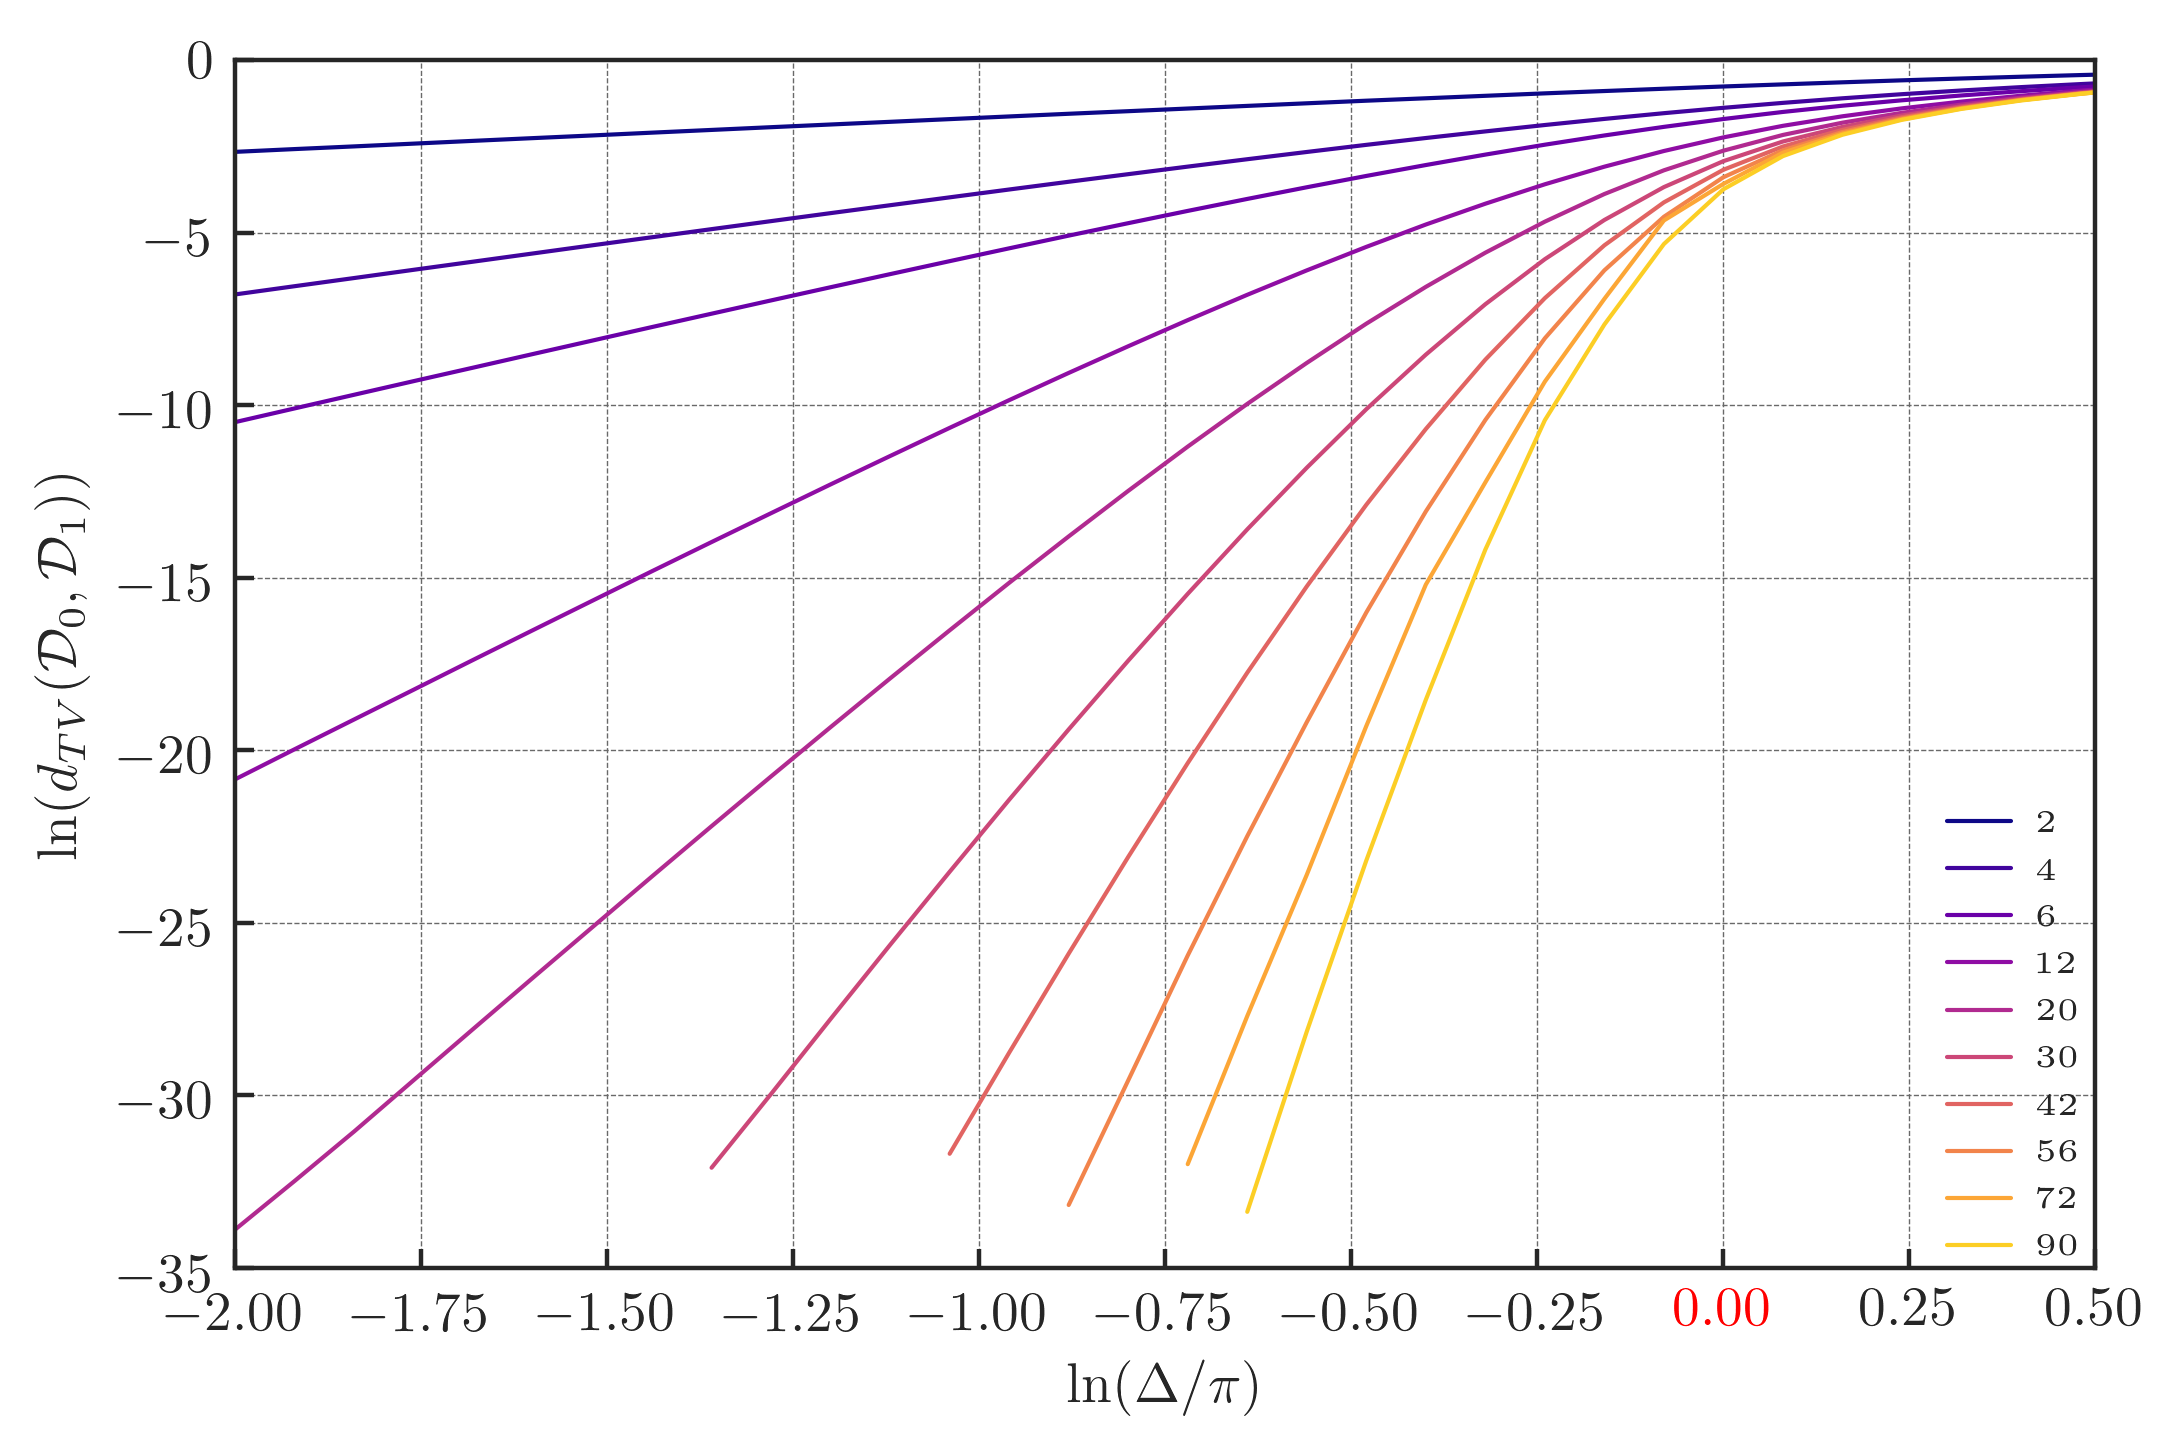

In [50]:
# plot curves with log scaling
plt.rc('text', usetex=True)
sns.set_style("ticks", {'grid.linestyle': '--'})
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
cm = plt.get_cmap('plasma')
NUM_COLORS = len(ks)
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.grid(color='dimgray',linestyle='--',linewidth=0.25)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.set(xlim=(-2,0.5))
ax.set(ylim=(-30,0))
ax.set_xlabel('$\ln(\Delta/\pi)$')
ax.set_ylabel('$\ln(d_{TV}(\mathcal{D}_0,\mathcal{D}_1))$')
plt.xticks(np.arange(-2,0.75,0.25))
plt.yticks(np.array([-35,-30,-25,-20,-15,-10,-5,0]))

fontP = FontProperties()
fontP.set_size('xx-small')
fontP.set_family('monospace')
for _,s in ax.spines.items():
    s.set_linewidth(0.8)

for i in range(len(ks)):
    prop = next(ax._get_lines.prop_cycler)
    c = prop['color']
    plt.plot(seps[15:cutoffs[i]],np.log(vals[i,15:cutoffs[i]]),color=c,label='$%d$'%ks[i],linewidth=0.75)

leg = plt.legend(loc='lower right', frameon=False,prop=fontP)
plt.draw()
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = 0.0075
yOffset = -0.02
bb.x0 += xOffset
bb.x1 += xOffset
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

# draw marker for Abbe limit at the origin
ax.get_xticklabels()[8].set_color("red")

plt.show()